In [82]:
import pandas as pd
import pylab as pl
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import Imputer, MinMaxScaler
from sklearn.metrics import confusion_matrix
%pylab inline

df = pd.read_csv('../data/sample_data.csv', sep=',', header=0, index_col=0)
print df.columns
df.head()

Populating the interactive namespace from numpy and matplotlib
Index([u'site_id', u'strategy_id', u'list_type', u'line_id', u'adv_id',
       u'adv_vertical', u'name', u'goal', u'price', u'limit', u'avg_bid',
       u'max_bid', u'impressions', u'conversions', u'avg_imps_site',
       u'stdev_imps_site', u'win_rate_site', u'win_rate_strat', u'cvr_strat',
       u'cvr', u'line_cvr', u'hist_zscore', u'overlap', u'target_variable',
       u'win_rate_site_table', u'win_rate_strat_table'],
      dtype='object')


`%matplotlib` prevents importing * from pylab and numpy


,site_id,strategy_id,list_type,line_id,adv_id,adv_vertical,name,goal,price,limit,...,win_rate_site,win_rate_strat,cvr_strat,cvr,line_cvr,hist_zscore,overlap,target_variable,win_rate_site_table,win_rate_strat_table
0,82932,313729,testing,20049,206,Travel,Nicole,0,3.95,10000,...,0.423778,0.111431,0,0.001197,0,2.708366,0.001066,0,0.450094,0.249479
1,90474,313729,testing,20049,206,Travel,Nicole,0,3.95,10000,...,0.163010,0.111431,0,0.001239,0,1.188635,0.000703,0,0.158050,0.249479
2,92345,313729,testing,20049,206,Travel,Nicole,0,3.95,10000,...,0.318358,0.111431,0,0.000729,0,1.503285,0.000873,0,0.360591,0.249479
3,92415,313729,testing,20049,206,Travel,Nicole,0,3.95,10000,...,0.133199,0.111431,0,0.005894,0,35.153628,0.004614,0,0.113717,0.249479
4,92425,313729,testing,20049,206,Travel,Nicole,0,3.95,10000,...,0.379310,0.111431,0,0.000000,0,-0.091378,0.000344,0,0.019308,0.249479


#### Define the features of interest

and drop any rows in those feature columns that have any NaN values

In [95]:
features = ['hist_zscore', 'overlap', 'avg_bid', 'win_rate_strat', 'goal', 'target_variable']
df = df[features].dropna(subset=features[:1])
df.head()

,hist_zscore,overlap,avg_bid,win_rate_strat,goal,target_variable
0,2.708366,0.001066,2.75,0.111431,0,0
1,1.188635,0.000703,2.75,0.111431,0,0
2,1.503285,0.000873,2.75,0.111431,0,0
3,35.153628,0.004614,2.75,0.111431,0,0
4,-0.091378,0.000344,2.75,0.111431,0,0


In [84]:
min_max_scaler = MinMaxScaler()
knn_scaled = min_max_scaler.fit_transform(df[features])
#df_knn.ix[:,:5] = df_knn.ix[:,:5].apply(lambda x: MinMaxScaler().fit_transform(x.reshape(1,1)))
df_knn = pd.DataFrame(knn_scaled, columns=features)

In [85]:
print len(df), len(df_knn)
test_idx = np.random.uniform(0, 1, len(df_knn)) <= 0.3
train = df_knn[test_idx==True]
test = df_knn[test_idx==False]
train.head()

1010 1010


,hist_zscore,overlap,avg_bid,win_rate_strat,goal,target_variable
1,0.020827,0.004296,0.057692,0.089926,0,0
2,0.022320,0.005334,0.057692,0.089926,0,0
3,0.181919,0.028201,0.057692,0.089926,0,0
15,0.148400,0.017560,0.057692,0.089926,0,0
20,0.020175,0.000404,0.057692,0.089926,0,0


In [91]:
results = []
for n in range(1, 11, 2):
    clf = KNeighborsClassifier(n_neighbors=n)
    clf.fit(train.ix[:,:5], train.ix[:,5])
    preds = clf.predict(test.ix[:,:5])
    accuracy = np.where(preds==test.ix[:,5], 1, 0).sum() / float(len(test))
    recall = np.where((preds==test.ix[:,5])&(test.ix[:,5]==1), 1, 0).sum()/float(np.where(test==1,1,0).sum())
    num_wrong = np.where(preds!=test.ix[:,5], 1, 0).sum()
    print "Neighbors: %d, Accuracy: %3f, Recall: %3f, Number wrong: %d, Total positive: %d" % (n, accuracy, recall, num_wrong, len(test))
    print confusion_matrix(test.ix[:,5], preds)
    results.append([n, accuracy, recall])

results = pd.DataFrame(results, columns=["n", "accuracy", "recall"])

Neighbors: 1, Accuracy: 0.979424, Recall: 0.186813, Number wrong: 15, Total positive: 729
[[697  11]
 [  4  17]]
Neighbors: 3, Accuracy: 0.986283, Recall: 0.131868, Number wrong: 10, Total positive: 729
[[707   1]
 [  9  12]]
Neighbors: 5, Accuracy: 0.986283, Recall: 0.120879, Number wrong: 10, Total positive: 729
[[708   0]
 [ 10  11]]
Neighbors: 7, Accuracy: 0.976680, Recall: 0.043956, Number wrong: 17, Total positive: 729
[[708   0]
 [ 17   4]]
Neighbors: 9, Accuracy: 0.971193, Recall: 0.000000, Number wrong: 21, Total positive: 729
[[708   0]
 [ 21   0]]


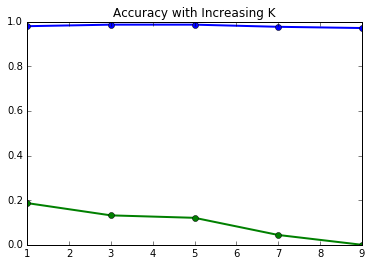

In [92]:
plt.rc("lines", lw=2, marker='o')

pl.plot(results.n, results.accuracy)
pl.plot(results.n, results.recall)
pl.ylim([0,1])
pl.title("Accuracy with Increasing K")
pl.show()

In [76]:
MinMaxScaler.fit_transform()

TypeError: unbound method fit_transform() must be called with MinMaxScaler instance as first argument (got nothing instead)